<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/ET_Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdaBoost (Adaptive Boosting)

AdaBoost, short for Adaptive Boosting, is one of the first successful boosting algorithms developed by Yoav Freund and Robert Schapire in 1996. It's an ensemble learning method that works by combining multiple "weak learners" (typically simple decision trees, often called stumps, which are decision trees with only one split) to create a single "strong learner" that can make accurate predictions.

### Core Idea of Boosting

Boosting is a general ensemble method that aims to sequentially improve the model's performance by focusing on the examples that previous models misclassified. Unlike bagging (e.g., Random Forest), where models are built independently and then averaged, boosting builds models sequentially, with each new model trying to correct the errors of the preceding ones.

### How AdaBoost Works (Algorithm Steps):

Let's break down the process step-by-step:

1.  **Initialize Weights:**
    *   Every data point in the training set is initially assigned an equal weight. If you have `N` data points, each gets a weight of `1/N`.

2.  **Iterative Training of Weak Learners:**
    *   AdaBoost iterates for a predetermined number of `M` rounds (or until a certain performance threshold is met).
    *   In each round `m` (from `1` to `M`):
        a.  **Train a Weak Learner:** A weak learner (e.g., a decision stump) is trained on the training data. The training process for this weak learner takes into account the current weights of the data points. It tries to minimize the weighted error.
        b.  **Calculate Weighted Error:** The error rate (`error_m`) of this weak learner is calculated, considering the weights of the misclassified samples. Misclassified samples contribute more to the error than correctly classified ones due to their higher weights.
            `error_m = sum(weights[i] for i in misclassified_samples)`
        c.  **Calculate Learner's Performance (Alpha):** A measure of the weak learner's importance (`alpha_m`) is calculated. This value is higher for learners that perform better (i.e., have a lower error rate). A common formula is:
            `alpha_m = 0.5 * log((1 - error_m) / error_m)`
            If `error_m` is 0.5 (random guessing), `alpha_m` is 0. If `error_m` is very low, `alpha_m` is high and positive. If `error_m` is very high, `alpha_m` is negative (meaning the classifier is worse than random and its predictions should be inverted).
        d.  **Update Data Point Weights:** The weights of the data points are updated for the next round:
            *   **Increase weights for misclassified samples:** If a data point was misclassified by the current weak learner, its weight is increased. This ensures that the next weak learner focuses more on correctly classifying these previously difficult examples.
            *   **Decrease weights for correctly classified samples:** If a data point was correctly classified, its weight is decreased.
            *   All weights are then normalized so they sum up to 1 again.

3.  **Combine Weak Learners:**
    *   After `M` rounds, AdaBoost combines all `M` weak learners into a single strong classifier.
    *   Each weak learner's prediction is weighted by its `alpha_m` value (its importance).
    *   For classification tasks, the final prediction is made by taking a weighted majority vote of all the weak learners.

    `Final_Prediction(x) = sign(sum(alpha_m * h_m(x) for m in 1 to M))`
    (where `h_m(x)` is the prediction of the m-th weak learner for input `x`)

### Key Characteristics and Advantages:

*   **Simple to Implement:** The core algorithm is relatively straightforward.
*   **Effective:** It often achieves high accuracy and can be competitive with more complex algorithms.
*   **No Hyperparameters for Weak Learners:** The weak learners (stumps) are typically very simple and don't require much tuning.
*   **Adaptive:** It naturally adapts to the data by focusing on hard-to-classify samples.
*   **Feature Selection:** Can implicitly perform some form of feature selection, as strong features will be utilized by the weak learners.
*   **Theoretical Guarantees:** AdaBoost has strong theoretical foundations regarding its ability to reduce training error.

### Disadvantages and Limitations:

*   **Sensitive to Noisy Data/Outliers:** Because it iteratively focuses on misclassified points, AdaBoost can be sensitive to noisy data or outliers, which may get extremely high weights and cause subsequent weak learners to overfit to these anomalous points.
*   **Requires Good Weak Learners:** While a weak learner can be just slightly better than random, if it's too weak, the boosting process might not converge effectively.
*   **Computationally Intensive:** Sequential nature means it can't be easily parallelized like bagging methods.
*   **Prone to Overfitting:** If the number of weak learners (`M`) is too high, especially with noisy data, AdaBoost can overfit the training data.

### AdaBoost in Ensemble Technique Landscape:

AdaBoost is a foundational algorithm in the family of **boosting** ensemble methods. It laid the groundwork for more advanced boosting algorithms like Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost), which generalize the boosting concept. While AdaBoost primarily focuses on classification, the concept of sequentially building models and re-weighting data points is central to all boosting approaches.

In summary, AdaBoost is a powerful and elegant algorithm that demonstrates the strength of combining multiple simple models to achieve a highly accurate and robust predictive system, particularly effective in classification tasks.

### What are Weighted Errors?

The basic concept behind AdaBoost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.

The weight of each sample for the first iteration is:

$Weight(x_i) = \frac{1}{n}$

where,

*   $x_i = i^{th}$ sample
*   $n = $ number of samples

### How is an AdaBoost Model Trained?

A weak classifier (decision stump) is prepared on the training data using the weighted samples. Only binary (two-class) classification problems are supported, so each decision stump makes one decision on one input variable and outputs a +1.0 or -1.0 value for the first or second class value.

The misclassification rate is calculated for the trained model:

$Error = \frac{\sum_i w(i) \cdot t_{error}(i)}{\sum_i w(i)}$

where,

*   $w$ is the weight for sample $i$
*   $t_{error}$ is the prediction error for sample $i$ which is 1 if misclassified and 0 if correctly classified

For example, if we had 3 samples with the weights 0.01, 0.5 and 0.2. The predicted values were -1, -1 and -1, and the actual output variables in the instances were -1, 1 and -1, then the $t_{errors}$ would be 0, 1, and 0. The misclassification rate would be calculated as:

Error = (0.01 * 0 + 0.5 * 1 + 0.2 * 0) / (0.01 + 0.5 + 0.2) = 0.704

### What is a Stage Value?

A stage value is calculated for the trained model which provides a weighting for any predictions that the model makes. The stage value for a trained model is calculated as follows:

$stage = \ln(\frac{1 - error}{error})$

where,

*   $stage$ is the stage value used to weight predictions from the model
*   $\ln()$ is the natural logarithm
*   $error$ is the misclassification error for the model.

The effect of the stage weight is that more accurate models have more weight or contribution to the final prediction.

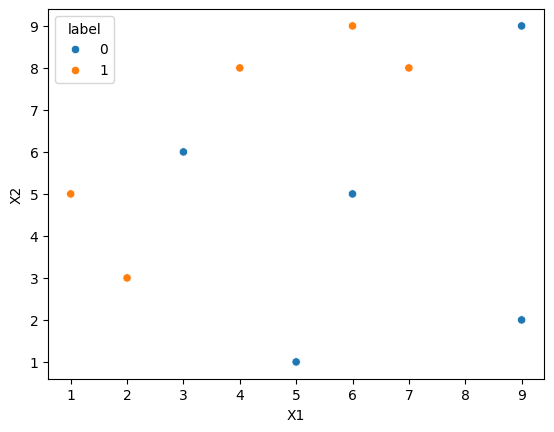

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a simple dataset
df = pd.DataFrame()
df['X1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

# Plot the dataset
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])
plt.show()

In [188]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [189]:
df.shape

(10, 3)

Step 1: Initialize Weights


In [190]:
df['weights'] = 1 / df.shape[0]

In [191]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


Step 2: Train the First Weak Learner


We'll use a decision tree with a maximum depth of 1 as our weak learner. Here, we train a decision tree classifier with a maximum depth of 1 (a decision stump) on the dataset. We then visualize the decision tree and its decision regions. Finally, we make predictions on the training data and store them in the y_pred column.

In [192]:
df.columns

Index(['X1', 'X2', 'label', 'weights'], dtype='object')

In [193]:
X

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]])

In [194]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

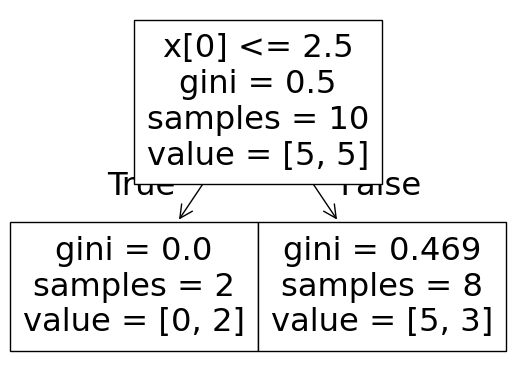

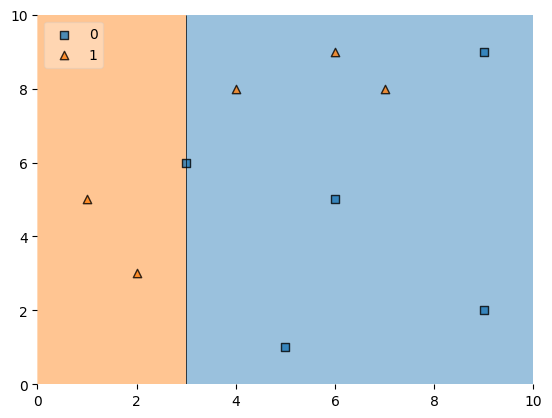

In [195]:
#X -input Feature
#y -target label
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

dt1 = DecisionTreeClassifier(max_depth=1)
dt1.fit(X, y)

plot_tree(dt1)
plt.show()

plot_decision_regions(X, y, clf=dt1, legend=2)
plt.show()

df['y_pred'] = dt1.predict(X)

In [196]:
df['y_pred']=dt1.predict(X)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


Step 3: Calculate Model Weight (Alpha)


The model weight α is calculated based on the error rate of the weak learner. The model weight α is computed using the formula:

α=0.5log(
error
1−error
​
 )

This weight indicates the importance of the weak learner based on its error rate.

In [197]:
def calculate_model_weight(error):
    return 0.5 * np.log((1 - error) / error)

error1 = 0.3
alpha1 = calculate_model_weight(error1)
alpha1

np.float64(0.42364893019360184)

Step 4: Update Weights


The weights of the instances are updated based on whether they were correctly classified. The weights are updated using the formula:

we
Where
y
i
​
 is the true label and
y
i
′
​
  is the predicted label. The weights are then normalized so that they sum to 1.

In [198]:
def update_row_weights(row, alpha):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

df['updated_weights'] = df.apply(update_row_weights, alpha=alpha1, axis=1)
df

df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()

In [199]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
3,4,8,1,0.1,0,0.152753,0.166667
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,0,0.152753,0.166667
6,6,5,0,0.1,0,0.065465,0.071429
7,7,8,1,0.1,0,0.152753,0.166667
8,9,9,0,0.1,0,0.065465,0.071429
9,9,2,0,0.1,0,0.065465,0.071429


Step 5: Create a New Dataset


We create a new dataset by sampling instances based on their normalized weights. Instances with higher weights are more likely to be selected multiple times.

In [200]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'].shift(1).fillna(0)
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065465,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.071429,0.142857,0.071429
2,3,6,0,0.1,0,0.065465,0.071429,0.214286,0.142857
3,4,8,1,0.1,0,0.152753,0.166667,0.380952,0.214286
4,5,1,0,0.1,0,0.065465,0.071429,0.452381,0.380952
5,6,9,1,0.1,0,0.152753,0.166667,0.619048,0.452381
6,6,5,0,0.1,0,0.065465,0.071429,0.690476,0.619048
7,7,8,1,0.1,0,0.152753,0.166667,0.857143,0.690476
8,9,9,0,0.1,0,0.065465,0.071429,0.928571,0.857143
9,9,2,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [201]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices



In [202]:
index_values=create_new_dataset(df)
index_values

[9, 2, 2, 5, 5, 5, 3, 3, 3, 3]

In [203]:
new_df = df.loc[index_values, ['X1', 'X2', 'label', 'weights']]
new_df

,X1,X2,label,weights
9,9,2,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1


Step 6: Train the Second Weak Learner


We repeat the process with the new dataset. We train a second decision tree on the new dataset, visualize its decision regions and compute its model weight based on its error rate.

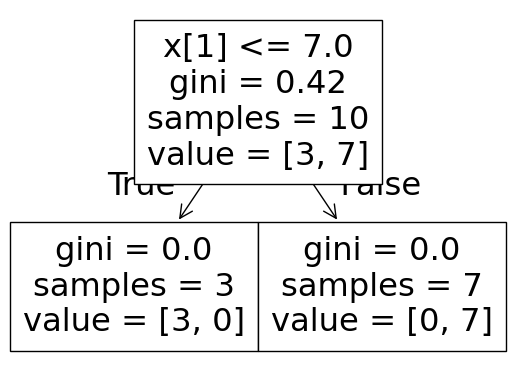

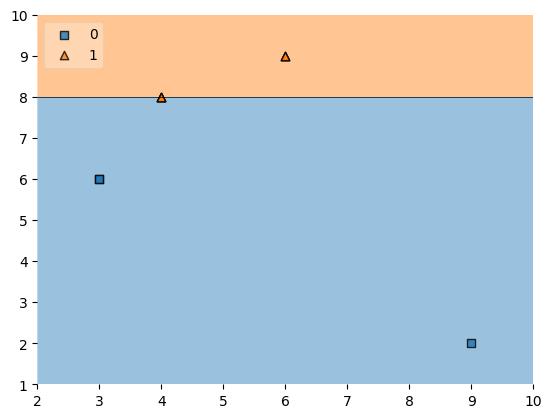

np.float64(1.0986122886681098)

In [204]:
X_new = new_df.iloc[:, 0:2].values
y_new = new_df.iloc[:, 2].values

dt2 = DecisionTreeClassifier(max_depth=1)
dt2.fit(X_new, y_new)

plot_tree(dt2)
plt.show()

plot_decision_regions(X_new, y_new, clf=dt2, legend=2)
plt.show()

new_df['y_pred'] = dt2.predict(X_new)
new_df

error2 = 0.1
alpha2 = calculate_model_weight(error2)
alpha2

In [205]:
new_df['y_pred'] = dt2.predict(X_new)
new_df

,X1,X2,label,weights,y_pred
9,9,2,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1


Step 7: Update Weights Again


The weights are updated again using the same formula and then normalized, based on the new predictions.






In [206]:
new_df['updated_weights'] = new_df.apply(update_row_weights, alpha=alpha2, axis=1)

new_df['normalized_weights'] = new_df['updated_weights'] / new_df['updated_weights'].sum()
new_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
9,9,2,0,0.1,0,0.033333,0.1
2,3,6,0,0.1,0,0.033333,0.1
2,3,6,0,0.1,0,0.033333,0.1
5,6,9,1,0.1,1,0.033333,0.1
5,6,9,1,0.1,1,0.033333,0.1
5,6,9,1,0.1,1,0.033333,0.1
3,4,8,1,0.1,1,0.033333,0.1
3,4,8,1,0.1,1,0.033333,0.1
3,4,8,1,0.1,1,0.033333,0.1
3,4,8,1,0.1,1,0.033333,0.1


Step 8: Train the Third-Weak Learner


Repeat the process to train the third weak learner. We train a third decision tree, visualize its decision regions and compute its model weight.

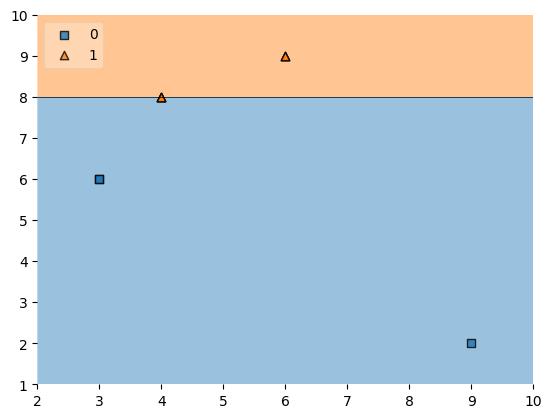

np.float64(-0.4236489301936017)

In [207]:
X_new = new_df.iloc[:, 0:2].values
y_new = new_df.iloc[:, 2].values

dt3 = DecisionTreeClassifier(max_depth=1)
dt3.fit(X_new, y_new)

plot_decision_regions(X_new, y_new, clf=dt3, legend=2)
plt.show()

new_df['y_pred'] = dt3.predict(X_new)
new_df

error3 = 0.7
alpha3 = calculate_model_weight(error3)
alpha3

Final Strong Classifier


In the final step, we combine the predictions of the weak learners using a weighted sum and make the final prediction based on the sign of the sum. The weights of the classifiers determine their influence on the final prediction. The final strong classifier is a weighted sum of the predictions from the weak learners.

In [208]:
def final_prediction(query, classifiers, alphas):
    predictions = np.array([clf.predict(query) for clf in classifiers])
    final_score = np.dot(alphas, predictions)
    return np.sign(final_score)

classifiers = [dt1, dt2, dt3]
alphas = [alpha1, alpha2, alpha3]

query1 = np.array([1, 5]).reshape(1, -1)
query2 = np.array([9, 9]).reshape(1, -1)

print(final_prediction(query1, classifiers, alphas))
print(final_prediction(query2, classifiers, alphas))

[1.]
[1.]
